# Exploratory Data Analysis

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Loading Data from CSV to pandas

In [4]:
cab_data_df = pd.read_csv('Dataset/Cab_Data.csv')
city_df = pd.read_csv('Dataset/City.csv')
customer_ID_df = pd.read_csv('Dataset/Customer_ID.csv')
transaction_ID_df = pd.read_csv('Dataset/Transaction_ID.csv')

### Cab_data preview

In [5]:
cab_data_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


### City data preview

In [6]:
city_df.head ()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


### Customer data preview

In [7]:
customer_ID_df.head(3)

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242


### Transaction ID data preview

In [8]:
transaction_ID_df.head(3)

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash


### Merge Data table

In [9]:
merged_df = pd.merge(customer_ID_df, transaction_ID_df, on='Customer ID', how='outer')
final_cab_df = pd.merge(merged_df, cab_data_df, on='Transaction ID', how='outer')

---

# Descriptive statistics of data

## Datatypes

In [10]:
cab_data_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [11]:
city_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [12]:
customer_ID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [13]:
transaction_ID_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


## Statistics

In [14]:
cab_data_df.describe()

,Transaction ID,Date of Travel,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,42964.067998,22.567254,423.443311,286.190113
std,1.268058e+05,307.467197,12.233526,274.378911,157.993661
min,1.000001e+07,42371.000000,1.900000,15.600000,19.000000
25%,1.011081e+07,42697.000000,12.000000,206.437500,151.200000
50%,1.022104e+07,42988.000000,22.440000,386.360000,282.480000
75%,1.033094e+07,43232.000000,32.960000,583.660000,413.683200
max,1.044011e+07,43465.000000,48.000000,2048.030000,691.200000


In [15]:
city_df.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


---

# Data Formating

1. convert in cab_data_df
    #### "Pink Cab" = 0
    #### "Yellow Cab" = 1

In [16]:
cab_data_df.Company.unique()

array(['Pink Cab', 'Yellow Cab'], dtype=object)

In [17]:
mapping = {k: v for v, k in enumerate(cab_data_df.Company.unique())}
mapping

{'Pink Cab': 0, 'Yellow Cab': 1}

In [18]:
cab_data_df['Company'] = cab_data_df.Company.map(mapping)
final_cab_df['Company'] = final_cab_df.Company.map(mapping)
cab_data_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,0,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,0,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,0,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,0,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,0,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,1,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,1,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,1,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,1,WASHINGTON DC,8.80,146.19,114.0480


---

# Data Analysis


### Data Devide Cab company wise

In [19]:
pink_cab_data_df = cab_data_df[cab_data_df['Company'] == 0]
yellow_cab_data_df = cab_data_df[cab_data_df['Company'] == 1]

cities = cab_data_df['City'].unique()


## Total Profit Analysis

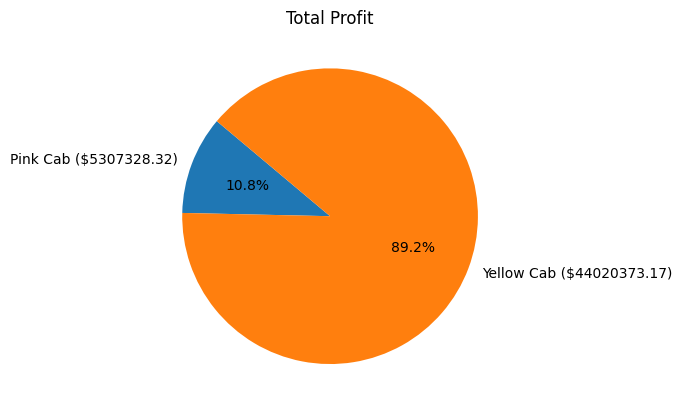

In [20]:
pink_cab_total_profit = round(sum(pink_cab_data_df['Price Charged'] - pink_cab_data_df['Cost of Trip']), 2)
yellow_cab_total_profit = round(sum(yellow_cab_data_df['Price Charged'] - yellow_cab_data_df['Cost of Trip']), 2)

# Data for Pie chart
labels = f'Pink Cab (${pink_cab_total_profit})', f'Yellow Cab (${yellow_cab_total_profit})'
sizes = [pink_cab_total_profit, yellow_cab_total_profit]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Profit')
plt.show()

### city wise profit

In [21]:
def profit_city_wise(data_df):
    result_data = {}
    cities = data_df['City'].unique()
    for city in cities: 
        total_profit_sum = round(sum(data_df.loc[data_df['City'] == city]['Price Charged'] - data_df.loc[data_df['City'] == city]['Cost of Trip']), 2)
        result_data[city] = total_profit_sum
    return result_data

pink_cab_city_wise_data = profit_city_wise(pink_cab_data_df)
yellow_cab_city_wise_data = profit_city_wise(yellow_cab_data_df)

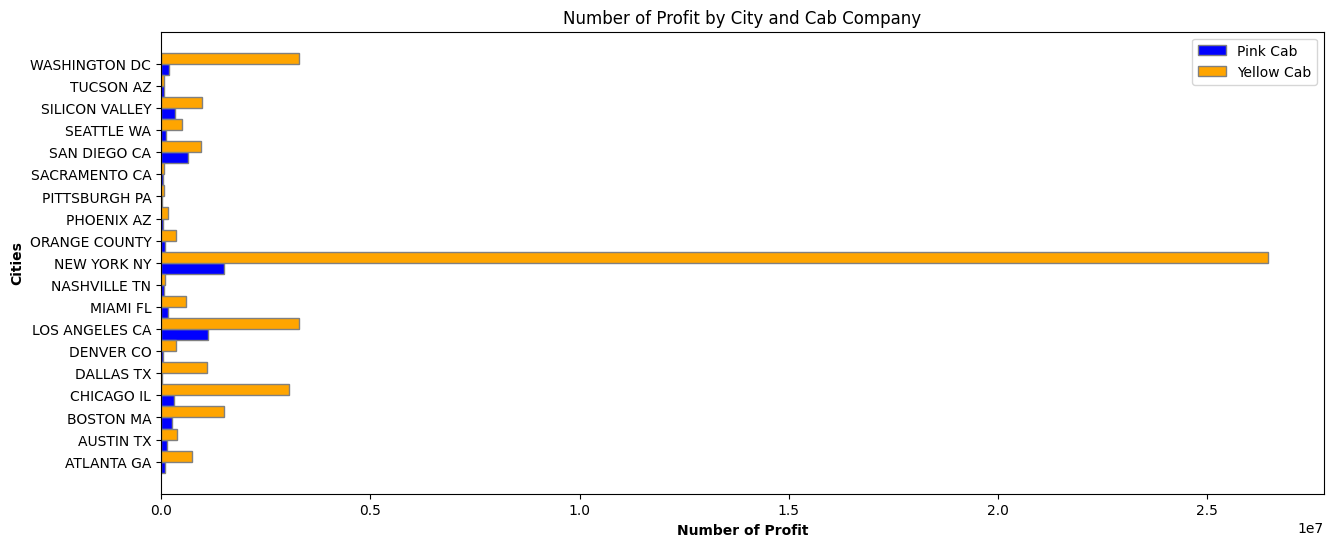

In [22]:
pink_cab_profit = pink_cab_city_wise_data.values()
yellow_cab_profit = yellow_cab_city_wise_data.values()

# Define the width of each bar
bar_height = 0.50

# Set the positions of the bars on the x-axis
r1 = range(len(cities))
r2 = [x + bar_height for x in r1]

# Set the figure size
plt.figure(figsize=(15, 6))

# Create the grouped bar plot
plt.barh(r1, pink_cab_profit, color='blue', height=bar_height, edgecolor='grey', label='Pink Cab')
plt.barh(r2, yellow_cab_profit, color='orange', height=bar_height, edgecolor='grey', label='Yellow Cab')

# Add labels and title
plt.ylabel('Cities', fontweight='bold')
plt.xlabel('Number of Profit', fontweight='bold')
plt.yticks([r + bar_height/2 for r in range(len(cities))], cities)
plt.title('Number of Profit by City and Cab Company')

plt.legend()
plt.show()

### City wise Total Profit in Numbers

In [23]:
# Data for table
table_data = {'Cities': cities, 'Pink Cab': pink_cab_profit, 'Yellow Cab': yellow_cab_profit}
table_data_df = pd.DataFrame(table_data)

table_data_df

,Cities,Pink Cab,Yellow Cab
0,ATLANTA GA,96050.08,746382.81
1,AUSTIN TX,147445.29,379255.74
2,BOSTON MA,262001.70,1506717.57
3,CHICAGO IL,318722.49,3068590.93
4,DALLAS TX,24730.11,1104003.15
5,DENVER CO,40584.94,357000.07
6,LOS ANGELES CA,1125732.07,3285976.58
7,MIAMI FL,162301.19,596000.05
8,NASHVILLE TN,64284.53,85247.68
9,NEW YORK NY,1511474.39,26451080.77


## Total No of Rides

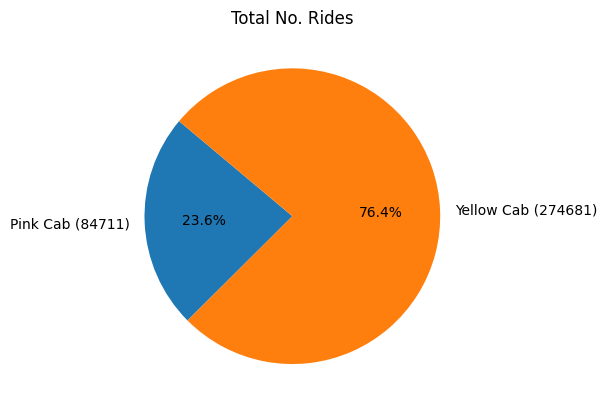

In [24]:
pink_cab_total_rides = len(pink_cab_data_df)
yellow_cab_total_rides = len(yellow_cab_data_df)

# Data for Pie chart
labels =  f'Pink Cab ({pink_cab_total_rides})' , f'Yellow Cab ({yellow_cab_total_rides})'
sizes = [pink_cab_total_rides, yellow_cab_total_rides]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total No. Rides')
plt.show()

## Total No of travelling(by KM) by cities

,Companies,Total KM Travelled
0,Pink Cab,1911073.11
1,Yellow Cab,6199417.47


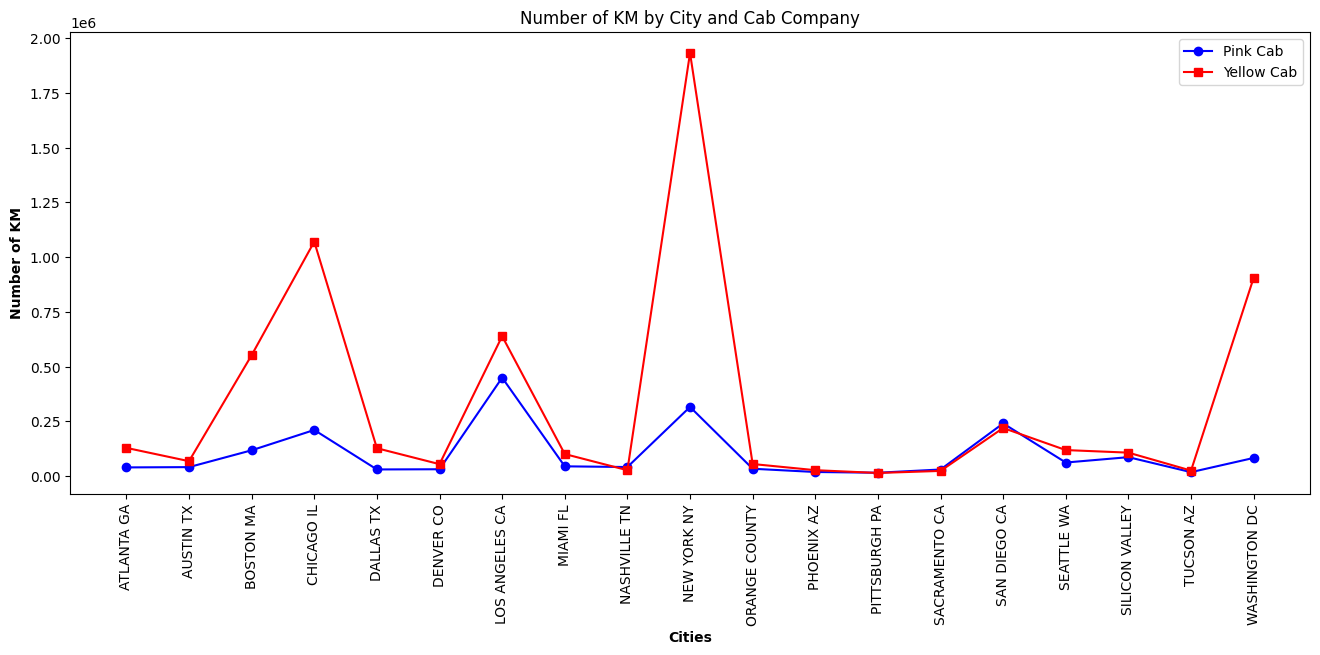

In [25]:
pink_cab_total_rides = sum(pink_cab_data_df['KM Travelled'])
yellow_cab_total_rides = sum(yellow_cab_data_df['KM Travelled'])

# Data for table for Total KM Travelling
table_data = {'Companies': ['Pink Cab', 'Yellow Cab'], 'Total KM Travelled': [pink_cab_total_rides, yellow_cab_total_rides]}
table_data_df = pd.DataFrame(table_data)
display(table_data_df)

# total KM travelling city wise 
def travelling_city_wise(data_df):
    result_data = {}
    cities = data_df['City'].unique()
    for city in cities: 
        total_KM_sum = round(sum(data_df.loc[data_df['City'] == city]['KM Travelled']), 2)
        result_data[city] = total_KM_sum
    return result_data

pink_cab_city_wise_data = travelling_city_wise(pink_cab_data_df).values()
yellow_cab_city_wise_data = travelling_city_wise(yellow_cab_data_df).values()

x = range(len(cities))

# Set the figure size
plt.figure(figsize=(16, 6))

# Create the grouped line chart
plt.plot(x, pink_cab_city_wise_data, marker='o', color='blue', label='Pink Cab')
plt.plot(x, yellow_cab_city_wise_data, marker='s', color='red', label='Yellow Cab')

# Add labels and title
plt.xlabel('Cities', fontweight='bold')
plt.ylabel('Number of KM', fontweight='bold')
plt.xticks(x, cities, rotation=90)
plt.title('Number of KM by City and Cab Company')

plt.legend()
plt.show()

## Customer Wise Analysis

### Customer Prefernce by Age Group

In [26]:
min_age = customer_ID_df['Age'].min()
max_age = customer_ID_df['Age'].max()

# Define age groups
age_bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65]  # Define the boundaries of age groups
age_labels = ['16-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65']  # Labels for age groups

# Create a new column with age groups
customer_ID_df['AgeGroup'] = pd.cut(customer_ID_df['Age'], bins=age_bins, labels=age_labels)

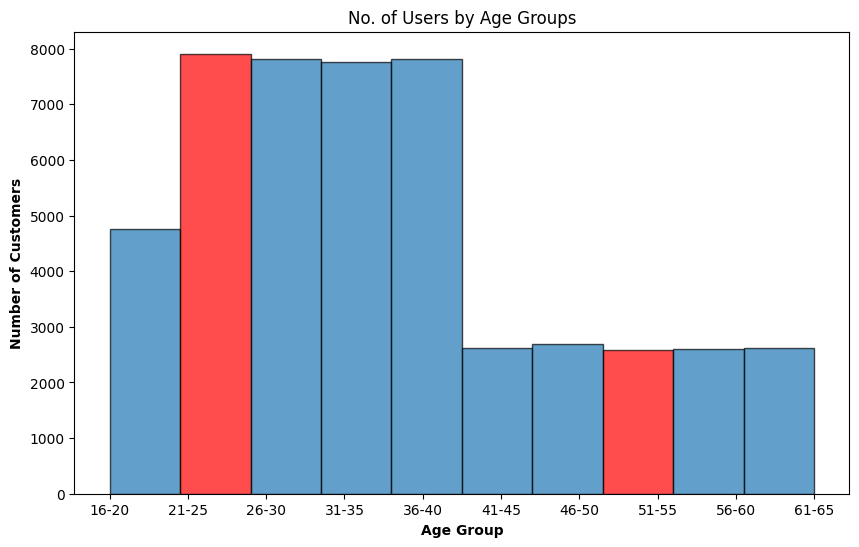

In [27]:
# Set the figure size
plt.figure(figsize=(10, 6))

# sorting AgeGroup wise
customer_ID_df = customer_ID_df.sort_values(by='AgeGroup')

# Plot histogram
counts, bins, patches = plt.hist(customer_ID_df['AgeGroup'], edgecolor='black', alpha=0.7)

# Find the index of the maximum and minimum value
max_index = counts.argmax()
min_index = counts.argmin()

# Highlight the maximum and minimum bar
patches[max_index].set_fc('red')
patches[min_index].set_fc('red')

# Add labels and title
plt.xlabel('Age Group', fontweight='bold')
plt.ylabel('Number of Customers', fontweight='bold')
plt.title('No. of Users by Age Groups')

# Show plot
plt.show()

### Customer Prefernce by Age Group by Company

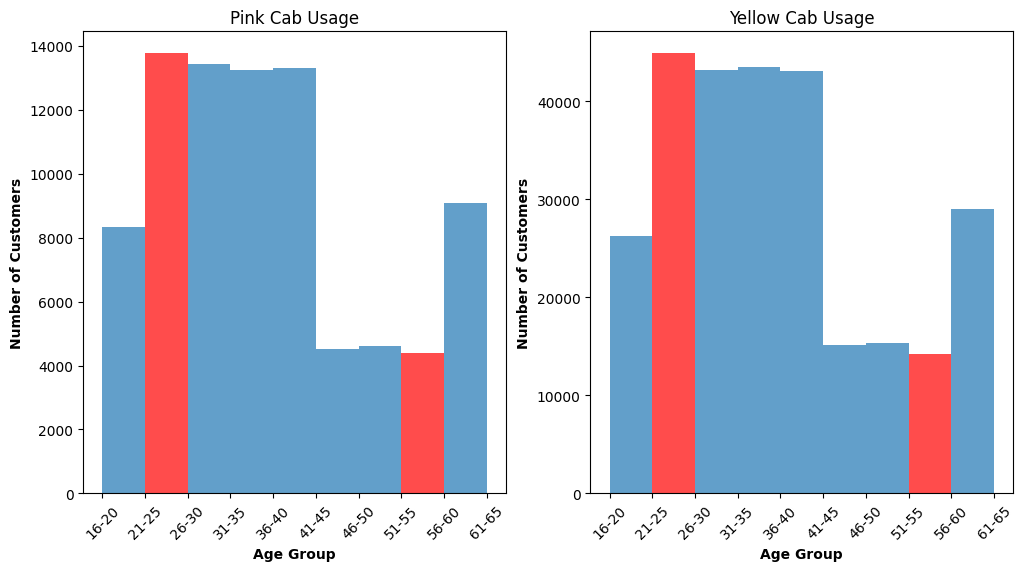

In [28]:
final_cab_df['AgeGroup'] =  pd.cut(final_cab_df['Age'], bins=age_bins, labels=age_labels)

# sorting AgeGroup wise
final_cab_df = final_cab_df.sort_values(by='AgeGroup')

pink_cab_agewise_final_cab_df = final_cab_df[final_cab_df['Company'] == 0]
yellow_cab_agewise_final_cab_df = final_cab_df[final_cab_df['Company'] == 1]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot Pink Cab histogram
counts_0, bins_0, patches_0 = axs[0].hist(pink_cab_agewise_final_cab_df['AgeGroup'], bins=range(10), alpha=0.7)
axs[0].set_title('Pink Cab Usage')
axs[0].tick_params(axis='x', labelrotation=45)

# Find the index of the maximum and minimum value
max_index_0 = counts.argmax()
min_index_0 = counts.argmin()

# Highlight the maximum and minimum bar
patches_0[max_index_0].set_fc('red')
patches_0[min_index_0].set_fc('red')


# Plot Yellow Cab histogram
counts_1, bins_1, patches_1 = axs[1].hist(yellow_cab_agewise_final_cab_df['AgeGroup'], bins=range(10), alpha=0.7)
axs[1].set_title('Yellow Cab Usage')
axs[1].tick_params(axis='x', labelrotation=45)

# Find the index of the maximum and minimum value
max_index_1 = counts.argmax()
min_index_1 = counts.argmin()

# Highlight the maximum and minimum bar
patches_1[max_index_1].set_fc('red')
patches_1[min_index_1].set_fc('red')

# Add labels and title
for ax in axs:
    ax.set_xlabel('Age Group', fontweight='bold')
    ax.set_ylabel('Number of Customers', fontweight='bold')

# Show plot
plt.show()

### Frequncy of use by user the same Cab

In [32]:
grouped_data = final_cab_df.groupby(['Customer ID', 'Company']).size().unstack(fill_value=0)

grouped_data.columns = ['pink cab', 'yellow cab']

grouped_data.describe()

,pink cab,yellow cab
count,46148.000000,46148.000000
mean,1.835638,5.952176
std,2.193602,7.964871
min,0.000000,0.000000
25%,0.000000,1.000000
50%,1.000000,2.000000
75%,3.000000,9.000000
max,18.000000,47.000000


<ul>
    <li>Pink Cab users, on average, utilize the service approximately <b>1.84 times</b>, whereas Yellow Cab users demonstrate a significantly higher    frequency, averaging around <b>5.95</b> uses.</li>
    <li>Moreover, Yellow Cab stands out with instances where a single user has utilized the service up to a remarkable <b>47 times</b>, indicating a strong potential for loyal and frequent customers.</li>
</ul>

# Recommendations

## Conclusions:

Total Profit Distribution: 
Pink Cab contributes 10.8% (\$5,307,328.82) of the total profit, while Yellow Cab dominates with) 89.2\% (\$44,020,373.17).

City-wise Revenue: Yellow Cab outperforms Pink Cab in most cities, with significantly higher revenues. In New York City, Yellow Cab's revenue is over 10 times higher than Pink Cab's.

Market Capture: Yellow Cab captures more than 76.04% of the market, leaving Pink Cab with only 23.6% market share.

Usage Trends:

Yellow Cab covers more distance due to its larger customer base.
The age group 21-25 shows the highest usage, while usage drops significantly after the age of 41.
User Frequency:

On average, Pink Cab users utilize the service approximately 1.84 times, whereas Yellow Cab users demonstrate a significantly higher frequency, averaging around 5.95 uses.
Yellow Cab has instances of very high usage by single users, indicating potential for loyal and frequent customers.
Recommendations:

Investment Preference: Considering Yellow Cab's dominant market share, higher profits, and stronger user base, investing in Yellow Cab seems more lucrative than Pink Cab.

Target Cities: Focus on cities where Yellow Cab performs exceptionally well, such as New York City, to maximize returns on investment.

Customer Retention: Develop strategies to retain and attract more customers within the 21-25 age group, as they exhibit the highest usage patterns.

** Loyalty Programs:** Capitalize on Yellow Cab's potential for loyal and frequent customers by introducing tailored loyalty programs to further enhance customer retention and increase revenue.

Market Expansion: Explore opportunities for Yellow Cab to expand its services into new cities or regions, leveraging its strong brand presence and market dominance.